# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.7.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


# Task 2: Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

170508288/170498071 [==============================] - 9s 0us/step


# Task 3: Visualize Examples

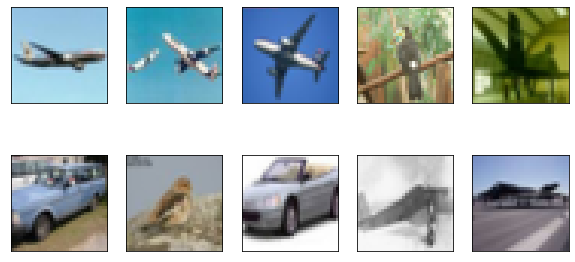

In [12]:
class_names = np.array(['aeroplane', 'car', 'bird'])

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
show_random_examples(x_train, y_train, y_train)

# Task 4: Create Model

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation='relu', padding = 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (32,32,3)))

    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
    
model = create_model()
model.summary()
    
        

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)       

# Task 5: Train the Model

In [8]:
h = model.fit(
x_train/255.0, y_train,
validation_data=(x_test/255.0, y_test),
epochs = 10, batch_size = 128)

Epoch 1/10
118/118 [==============================] - 11s 34ms/step - loss: 0.9388 - accuracy: 0.6673 - val_loss: 2.1751 - val_accuracy: 0.3520
Epoch 2/10
118/118 [==============================] - 3s 23ms/step - loss: 0.5662 - accuracy: 0.7704 - val_loss: 2.1479 - val_accuracy: 0.3453
Epoch 3/10
118/118 [==============================] - 3s 23ms/step - loss: 0.4959 - accuracy: 0.8015 - val_loss: 1.9964 - val_accuracy: 0.5113
Epoch 4/10
118/118 [==============================] - 3s 23ms/step - loss: 0.4515 - accuracy: 0.8221 - val_loss: 1.1092 - val_accuracy: 0.5900
Epoch 5/10
118/118 [==============================] - 3s 25ms/step - loss: 0.4214 - accuracy: 0.8347 - val_loss: 0.5726 - val_accuracy: 0.7800
Epoch 6/10
118/118 [==============================] - 3s 26ms/step - loss: 0.3866 - accuracy: 0.8466 - val_loss: 0.5591 - val_accuracy: 0.7987
Epoch 7/10
118/118 [==============================] - 3s 25ms/step - loss: 0.3609 - accuracy: 0.8599 - val_loss: 0.6845 - val_accuracy: 0.782

# Task 6: Final Predictions

In [14]:
y_pred = model.predict(x_test/255.0)
labels = class_names[np.argmax(y_pred, 1)]
print(labels)

['car' 'car' 'bird' ... 'car' 'bird' 'bird']
